# Import the Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# Data Collection

In [3]:
df=pd.read_csv("C:/Users/Pramoda A S/Desktop/AIML Documents/DataSets in CSV files/Boston.csv")
df

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  medv  
0    296     15.3  396.90   4.98  24.0  
1    242     17.8  396.90   9.14  21.6  
2    242     17.8  392.83   4.03  34.7  
3    222     18.7  394.63   2.94  33.4  
4    222     18.7  396.90   5.33  36.2  
..   ...      ...     ...    ...   ...  
501  273     21.0  391.99   9.67  22.4  
502  273     21.0  396.90   9.08  20.6  
503  273     21.0  396.90   5.64  23.9  
504  273     21.0  393.45   6.48  22.0  
505  273     21.0  396.90   7.88  11.9  

[506 rows x 15 columns]

# Data Analesis

In [4]:
df.head()

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


# Data preproccing

### Find the missing values.

In [6]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

### Find the outliers

<Axes: >

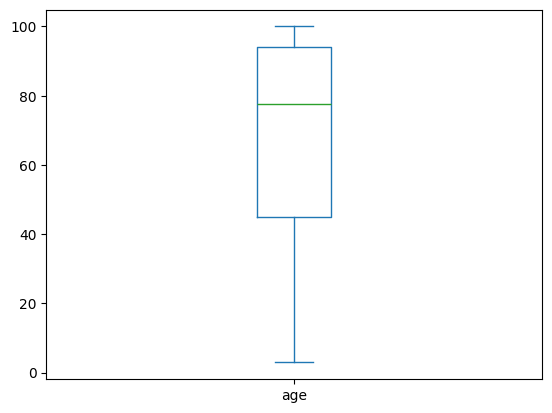

In [36]:
df['age'].plot(kind='box')

<Axes: >

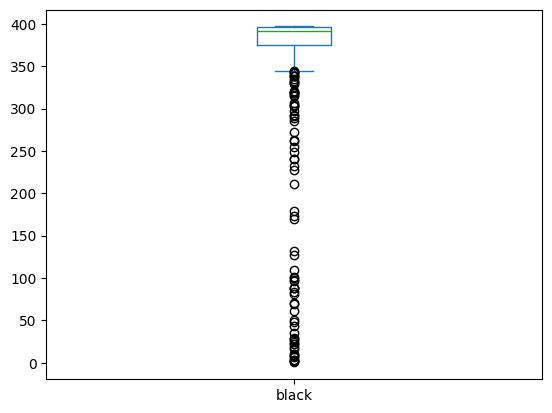

In [37]:
df['black'].plot(kind='box')

In [38]:
q1=df['black'].quantile(0.25)
q3=df['black'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

bat_arr=df['black']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

batt_arr=df['black']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

for i in df['black']:
    if i <lower_bound:
        df['black']=df['black'].replace(i,lower_cap)
    elif i >upper_bound:
        df['black']=df['black'].replace(i,upper_cap)



18     288.99
25     303.42
27     306.38
32     232.60
34     248.31
        ...  
466     22.01
467    331.29
475    302.76
489    344.05
490    318.43
Name: black, Length: 77, dtype: float64


<Axes: >

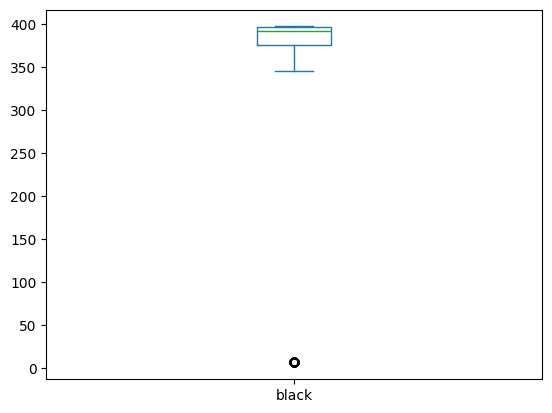

In [40]:
df["black"].plot(kind='box')        

<Axes: >

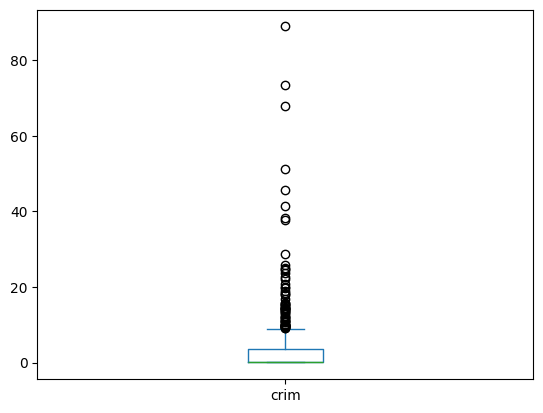

In [42]:
df['crim'].plot(kind='box')        

In [44]:
q1=df['crim'].quantile(0.25)
q3=df['crim'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

bat_arr=df['crim']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

batt_arr=df['crim']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

for i in df['crim']:
    if i <lower_bound:
        df['crim']=df['crim'].replace(i,lower_cap)
    elif i >upper_bound:
        df['crim']=df['crim'].replace(i,upper_cap)



367    13.5222
371     9.2323
373    11.1081
374    18.4982
375    19.6091
        ...   
468    15.5757
469    13.0751
477    15.0234
478    10.2330
479    14.3337
Name: crim, Length: 66, dtype: float64


<Axes: >

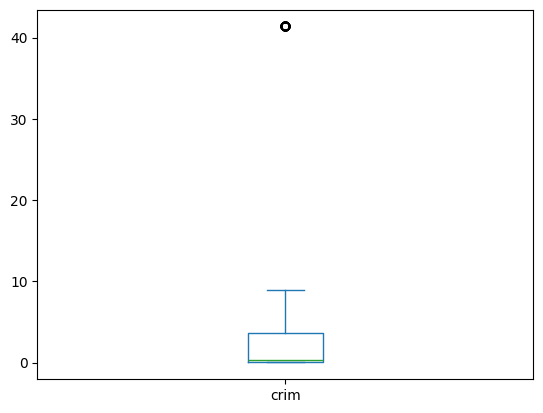

In [45]:
df['crim'].plot(kind='box')

In [ ]:
q1=df['crim'].quantile(0.25)
q3=df['crim'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

bat_arr=df['crim']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

batt_arr=df['crim']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

for i in df['crim']:
    if i <lower_bound:
        df['crim']=df['crim'].replace(i,lower_cap)
    elif i >upper_bound:
        df['crim']=df['crim'].replace(i,upper_cap)



<Axes: >

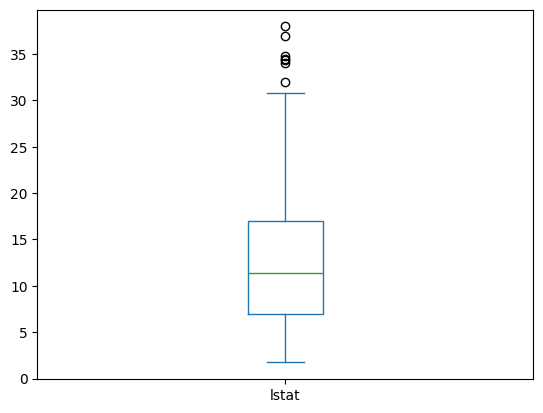

In [48]:
df['lstat'].plot(kind='box')

141    34.41
373    34.77
374    37.97
387    31.99
412    34.37
414    36.98
438    34.02
Name: lstat, dtype: float64


<Axes: >

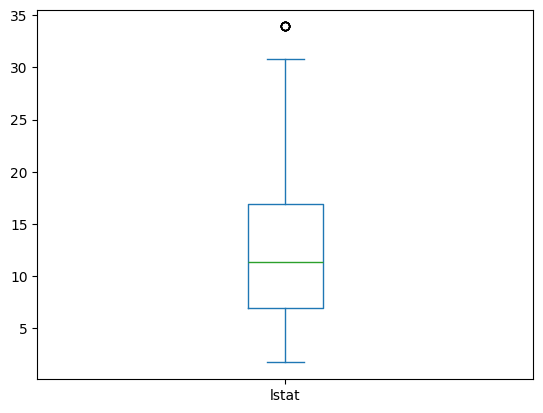

In [49]:
q1=df['lstat'].quantile(0.25)
q3=df['lstat'].quantile(0.75)
iqr=q3-q1

upper_bound=q3+(1.5*iqr)
lower_bound=q1-(1.5*iqr)

bat_arr=df['lstat']
out=bat_arr[(bat_arr<=lower_bound)|(bat_arr>=upper_bound)]                                    
print(out)

batt_arr=df['lstat']
lower_cap=np.percentile(batt_arr,1)
upper_cap=np.percentile(batt_arr,99)

for i in df['lstat']:
    if i <lower_bound:
        df['lstat']=df['lstat'].replace(i,lower_cap)
    elif i >upper_bound:
        df['lstat']=df['lstat'].replace(i,upper_cap)

df['lstat'].plot(kind='box')

In [50]:
x=df.drop('medv', axis=1)
y=df['medv']

In [51]:
x

Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  
0    296     15.3  396.90   4.98  
1    242     17.8  396.90   9.14  
2    242     17.8  392.83   4.03  
3    222     18.7  394.63   2.94  
4    222     18.7  396.90   5.33  
..   ...      ...     ...    ...  
501  273     21.0  391.99   9.67  
502  273     21.0  396.90   9.08  
503  273     21.0  396.90   5.64  
504  273     21.0  393.45   6.48  
505  273     21.0  396.90   7.88  

[506 rows x 14 columns]

In [52]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 14)
(102, 14)
(404,)
(102,)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [60]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [61]:
y_test_pred=model.predict(X_test)

rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
mse = mean_squared_error(y_test, y_test_pred)
r2=r2_score(y_test,y_test_pred)

In [62]:
print("Root mean squar is (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R2 is :",r2)

Root mean squar is (RMSE): 4.383520679284664
Mean Squared Error (MSE): 19.21525354571628
R2 is : 0.770316440128841
